# 引入

## 图像增强的简要定义

**图像增强**一般分为两种：

- 将数字图像变为使人眼更容易辨别的图像
- 将数字图像变为使计算机更容易识别的图像

无论是针对人眼改善图像质量，还是针对计算机改善图像质量，我们都把它称作 **「图像增强」**

# 灰度变换技术

## 反色变换

### 定义与公式

我们假设原始灰度图像的灰度范围为：$[0, L]$，则反色变换的过程可以使用如下公式进行描述：
$$
output = L - input
$$
其中，$output$ 指的是处理后的**结果图像**，$L$ 是图像**灰度范围内的最大值**，$input$ 指的是**某像素点的对应灰度值**

---

可能比较难理解，接下来通过例子进行说明

### 简单举例

假设有图像如下矩阵表示（每个元素对应的是像素点灰度值）：
$$
\left [
\begin{matrix}
0 & 20 & 160 \\
45 & 50 & 100 \\
100 & 45 & 30
\end{matrix}
\right]
$$
那么对于这个矩阵，其最大值显然为 $L = 160$

我们构建一个与原图`行`和`列`均相等的，元素均为 $L$ 的矩阵，然后进行二者作差：
$$
\left [
\begin{matrix}
160 & 160 & 160 \\
160 & 160 & 160 \\
160 & 160 & 160 
\end{matrix}
\right]
-
\left [
\begin{matrix}
0 & 20 & 160 \\
45 & 50 & 100 \\
100 & 45 & 30
\end{matrix}
\right]
=
\left [
\begin{matrix}
160 & 140 & 0 \\
115 & 110 & 80 \\
60 & 115 & 130
\end{matrix}
\right]
 = output
$$
就可以得到我们最终想要的输出图像

### Python实现

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# 反色变换函数
def image_inverse(inp):
    L = np.max(inp)  # 求输入图像的最大值
    output = L - inp  # numpy 自带与 PyTorch 的 BoardCast 机制，所以可以直接相减
    return output

if __name__ == '__main__':
    inp = np.array([
        [0, 20, 160],
        [45, 50, 100],
        [100, 45, 30]
    ])
    output = image_inverse(inp)
    print(output)

: 

可以看到，输出正确，方法实现完毕

### 实际图像测试
接下来我们使用一张可能实际用到的图片进行测试

![](反色变换/X.jpg)

这是一张乳房的 X 光图片，对本图片进行反色变换：

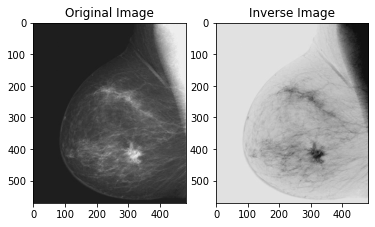

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# 反色变换函数
def image_inverse(inp):
    L = np.max(inp)  # 求输入图像的最大值
    output = L - inp  # numpy 自带与 PyTorch 的 BoardCast 机制，所以可以直接相减
    return output

if __name__ == '__main__':
    # 图像打开，传入图像，并通过convert方法转换为单通道灰度图像
    gray_img = np.asarray(Image.open('反色变换/X.jpg').convert('L'))
    inv_img = image_inverse(gray_img)
    # 图像显示
    fig = plt.figure()
    # 1行2列的第1个
    ax1 = fig.add_subplot(121)
    ax1.set_title('Original Image')
    ax1.imshow(gray_img, cmap='gray', vmin = 0, vmax = 255)

    ax2 = fig.add_subplot(122)
    ax2.set_title('Inverse Image')
    ax2.imshow(inv_img, cmap='gray', vmin = 0, vmax = 255)
    plt.show()

可以明显看到，经过反色变换后的图像，病灶变得更加明显，并且更利于内部组织的辨认

### 总结
反色变换实际上就是将灰度图像的灰度值反转过来，对于二值图像来说，那便是直接的黑白颠倒的效果
**作用：**
- 反色变换技术可以增强暗色背景图像中的明亮区域
- 处理后的图像在某些场景**更加符合人类的视觉特性**